# Tracer concentration on shelf bottom splitted in inner and outer shelves

Outer shelf goes from shelf break to 100 m isobath, and inner shelf from 100 m isobath all the way to the coast.


In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import pandas as pd

import os 

import sys

import seaborn as sns


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
#Base case, iso =1 , No 3d diff.
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
#CanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run03/gridGlob.nc'

CanyonGridOut = Dataset(CanyonGrid)

#NoCCanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'

NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)


In [5]:
labelsListCanyon = ['kiso = 10',
                    'Base', 
                    'kiso = 0.1',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'kv=3.8E-5',
                    'kv=2.8E-5',
                    'kv_can=1E-7, kv_out=1E-3',
                    'kv_can=1E-7, kv_out=1E-4',
                    'kv_can=1E-5, kv_out=1E-3',
                    'kv_can=1E-5, kv_out=1E-4',
]

labelsListFlat = ['Base flat',
                  'f=7.68E-5 flat',
                  'f=4.84E-5 flat',
                  'kv=1E-4 flat',
                  'kv=1E-3 flat',
                  'N=3.9E-3 flat',
                  'N=6.3E-3 flat',
                  'N=3.0E-3 flat',
                  'kv=1E-7 flat',
]


In [6]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')
bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')
rANoC = rout.getField(NoCCanyonGrid, 'rA')
rA = rout.getField(CanyonGrid, 'rA')

z = CanyonStateOut.variables['Z']

time = CanyonStateOut.variables['T']

## Area-weighted average concentration

$$\frac{\sum_{i=1}^{n} C_iA_i}{A_{shelf}}$$

where $n$ is the total number of cells that constitute the shelf bottom, $C_i$ is the concentration in the $i-th$ cell, $A_i$ its area and $A_{shelf}$ the sum of all the cell areas.

In [16]:
fileCanyon = 'results/metricsDataFrames/bottomConcentrationAreaFiltCanyonRunsCoastalInt.csv'

df = pd.read_csv(fileCanyon)
columns = df.columns.values.tolist()
time = df['day']

bottomConcCanyonOut = np.empty((len(time),len(columns[2:19])))
bottomConcCanyonIn = np.empty((len(time),len(columns[19:])))

ii = 0
for col in columns[2:19]:
    
    bottomConcCanyonOut[:,ii] = df[col] 
    ii = ii + 1

ii = 0
for col in columns[19:]:
    
    bottomConcCanyonIn[:,ii] = df[col] 
    ii = ii + 1
    

In [21]:
fileFlat = 'results/metricsDataFrames/bottomConcentrationAreaFiltFlatRunsCoastalInt.csv'

df2 = pd.read_csv(fileFlat)
columns2 = df2.columns.values.tolist()
time2 = df2['day']

bottomConcFlatOut = np.empty((len(time2),len(columns2[2:11])))
bottomConcFlatIn = np.empty((len(time2),len(columns2[11:])))

ii = 0
for col in columns2[2:11]:
    bottomConcFlatOut[:,ii] = df2[col] 
    ii = ii + 1

ii = 0
for col in columns2[11:]:
    bottomConcFlatIn[:,ii] = df2[col] 
    ii = ii + 1


In [22]:
colors = ["fresh green","soft green","shamrock green","dark mint green","peacock blue","sapphire","nice blue",
          "coral","tangerine","blood orange","scarlet","mud brown","dark plum","purplish","cerise","amethyst",
          "lavender pink"]
color_pal = sns.xkcd_palette(colors)

sns.set_palette(color_pal)


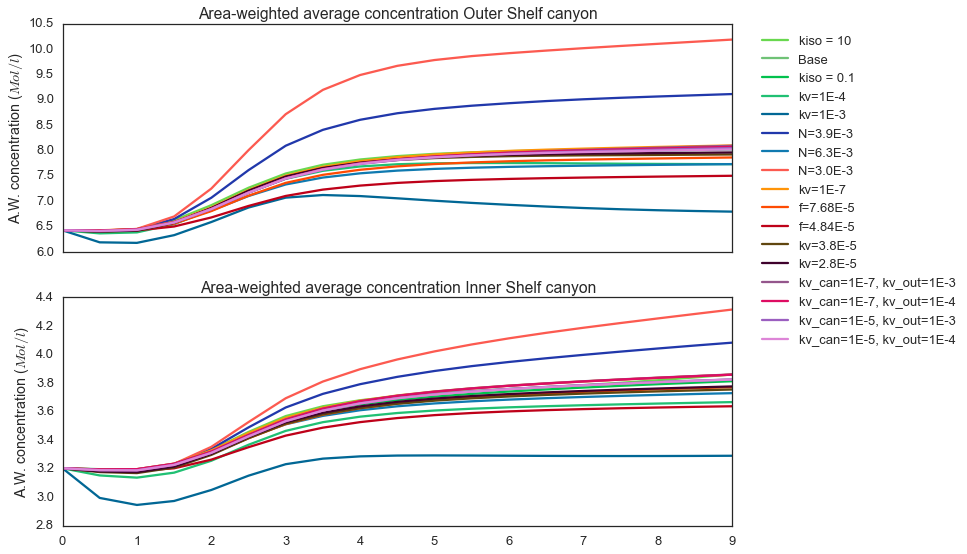

In [27]:
sns.set_context('talk', font_scale=1.0)

times = np.arange(19)/2.0

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

for ii in range(len(columns[2:19])):
    ax1.plot(times,bottomConcCanyonOut[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration Outer Shelf canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')

for ii in range(len(columns[2:19])):
    ax2.plot(times,bottomConcCanyonIn[:,ii],label=labelsListCanyon[ii])
    
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration Inner Shelf canyon ' )
    ax2.set_ylabel('A.W. concentration ($Mol/l$)')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.35,1))    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


## Canyon effect

In [28]:
labelsListCanyon = ['kiso = 10',
                    'Base', 
                    'kiso = 0.1',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'kv=3.8E-5',
                    'kv=2.8E-5',
                    'kv_can=1E-7, kv_out=1E-3',
                    'kv_can=1E-7, kv_out=1E-4',
                    'kv_can=1E-5, kv_out=1E-3',
                    'kv_can=1E-5, kv_out=1E-4',
]



In [32]:
flatArrayOut = np.empty((len(time),len(labelsListCanyon)))
flatArrayIn = np.empty((len(time),len(labelsListCanyon)))

flatArrayOut[:,0] = bottomConcFlatOut[:,0]
flatArrayOut[:,1] = bottomConcFlatOut[:,0]
flatArrayOut[:,2] = bottomConcFlatOut[:,0]
flatArrayOut[:,3] = bottomConcFlatOut[:,3]
flatArrayOut[:,4] = bottomConcFlatOut[:,4]
flatArrayOut[:,5] = bottomConcFlatOut[:,5]
flatArrayOut[:,6] = bottomConcFlatOut[:,6]
flatArrayOut[:,7] = bottomConcFlatOut[:,7]
flatArrayOut[:,8] = bottomConcFlatOut[:,8]
flatArrayOut[:,9] = bottomConcFlatOut[:,1]
flatArrayOut[:,10] = bottomConcFlatOut[:,2]
flatArrayOut[:,11] = bottomConcFlatOut[:,0]
flatArrayOut[:,12] = bottomConcFlatOut[:,0]
flatArrayOut[:,13] = bottomConcFlatOut[:,8]
flatArrayOut[:,14] = bottomConcFlatOut[:,8]
flatArrayOut[:,15] = bottomConcFlatOut[:,0]
flatArrayOut[:,16] = bottomConcFlatOut[:,0]

flatArrayIn[:,0] = bottomConcFlatIn[:,0]
flatArrayIn[:,1] = bottomConcFlatIn[:,0]
flatArrayIn[:,2] = bottomConcFlatIn[:,0]
flatArrayIn[:,3] = bottomConcFlatIn[:,3]
flatArrayIn[:,4] = bottomConcFlatIn[:,4]
flatArrayIn[:,5] = bottomConcFlatIn[:,5]
flatArrayIn[:,6] = bottomConcFlatIn[:,6]
flatArrayIn[:,7] = bottomConcFlatIn[:,7]
flatArrayIn[:,8] = bottomConcFlatIn[:,8]
flatArrayIn[:,9] = bottomConcFlatIn[:,1]
flatArrayIn[:,10] = bottomConcFlatIn[:,2]
flatArrayIn[:,11] = bottomConcFlatIn[:,0]
flatArrayIn[:,12] = bottomConcFlatIn[:,0]
flatArrayIn[:,13] = bottomConcFlatIn[:,8]
flatArrayIn[:,14] = bottomConcFlatIn[:,8]
flatArrayIn[:,15] = bottomConcFlatIn[:,0]
flatArrayIn[:,16] = bottomConcFlatIn[:,0]

labelsListFlatArray =['Base flat',
                    'Base flat', 
                    'Base flat',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'Base flat',
                    'Base flat',
                    'kv=1E-7',
                    'kv=1E-7',
                    'Base flat',
                    'Base flat',
]

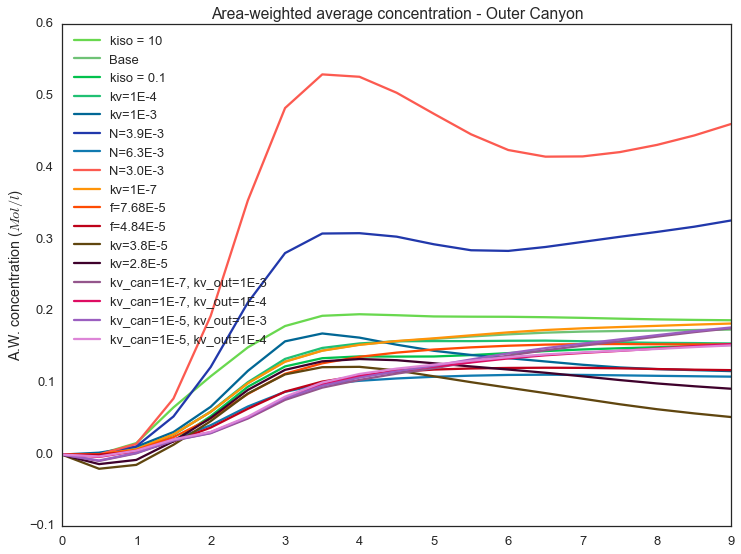

In [33]:
sns.set_context('talk', font_scale=1.0)

sns.set_palette(color_pal)

times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in range(len(columns[2:19])):
    ax1.plot(times,bottomConcCanyonOut[:,ii]-flatArrayOut[:,ii],
             label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Outer Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


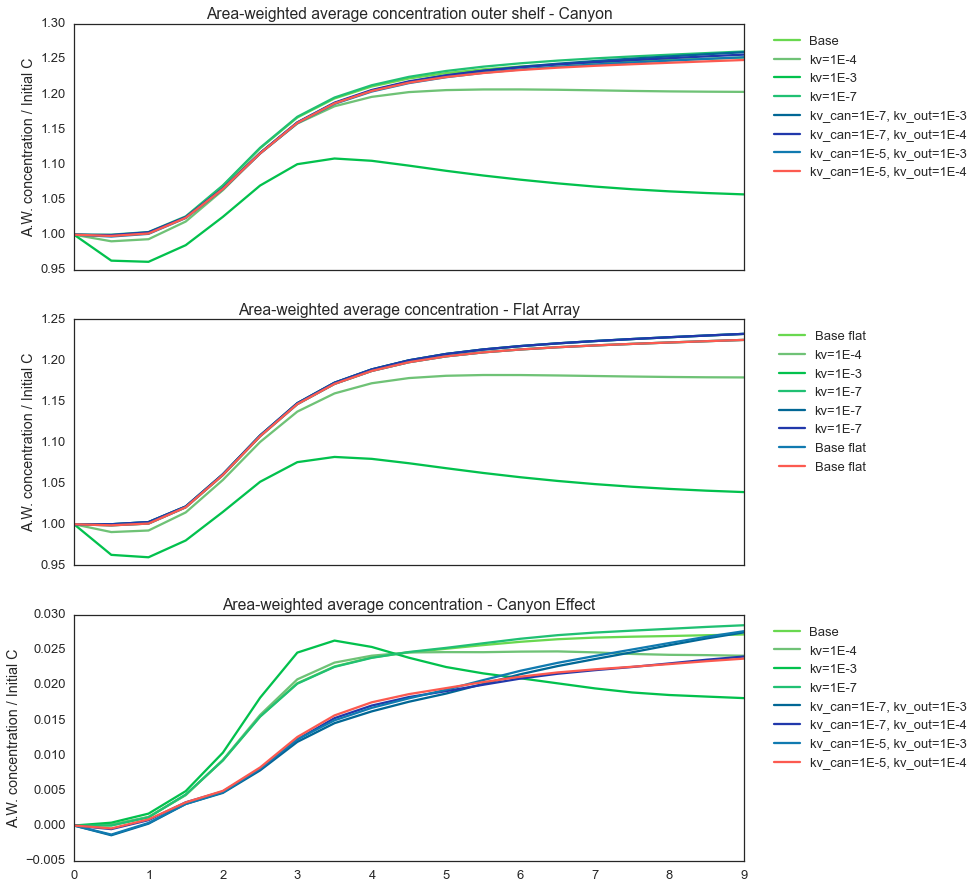

In [34]:
sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyonOut[:,ii]/bottomConcCanyonOut[0,ii],label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration outer shelf - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,flatArrayOut[:,ii]/flatArrayOut[0,ii],label=labelsListFlatArray[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,(bottomConcCanyonOut[:,ii]/bottomConcCanyonOut[0,ii])
             -(flatArrayOut[:,ii]/flatArrayOut[0,ii]),
             label=labelsListCanyon[ii]
            )
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.35,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.35,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


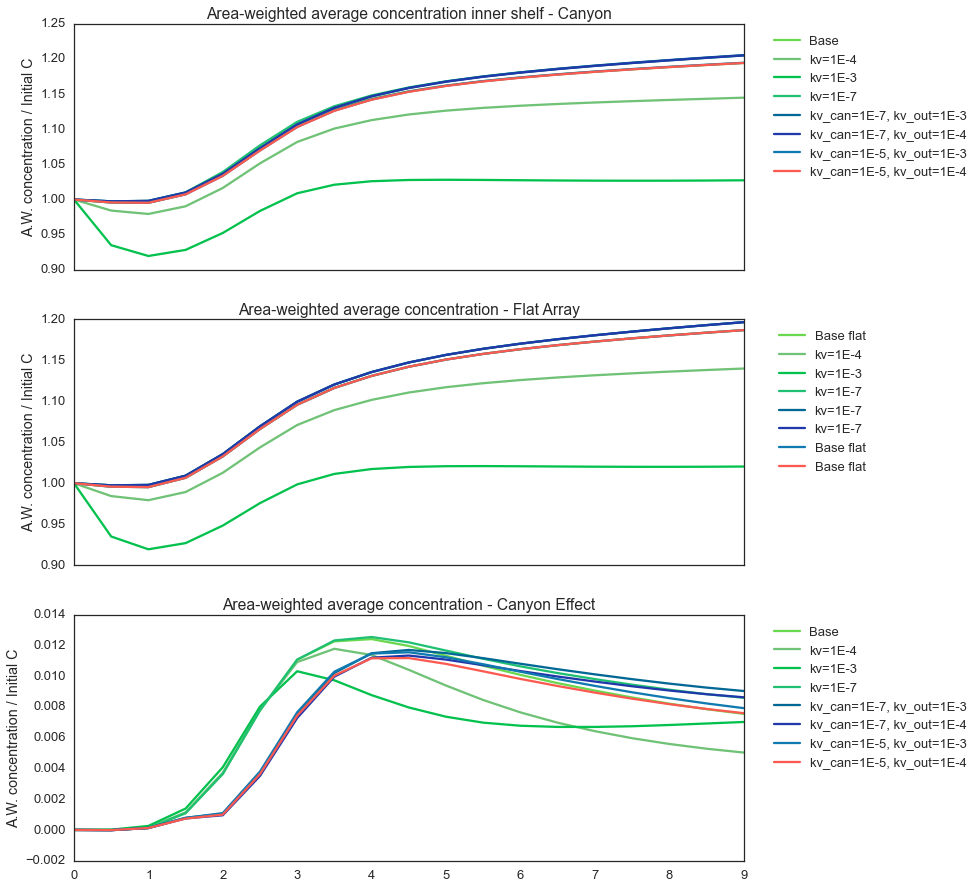

In [35]:
sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyonIn[:,ii]/bottomConcCanyonIn[0,ii],label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration inner shelf - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,flatArrayIn[:,ii]/flatArrayIn[0,ii],label=labelsListFlatArray[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,(bottomConcCanyonIn[:,ii]/bottomConcCanyonIn[0,ii])
             -(flatArrayIn[:,ii]/flatArrayIn[0,ii]),
             label=labelsListCanyon[ii]
            )
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.35,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.35,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


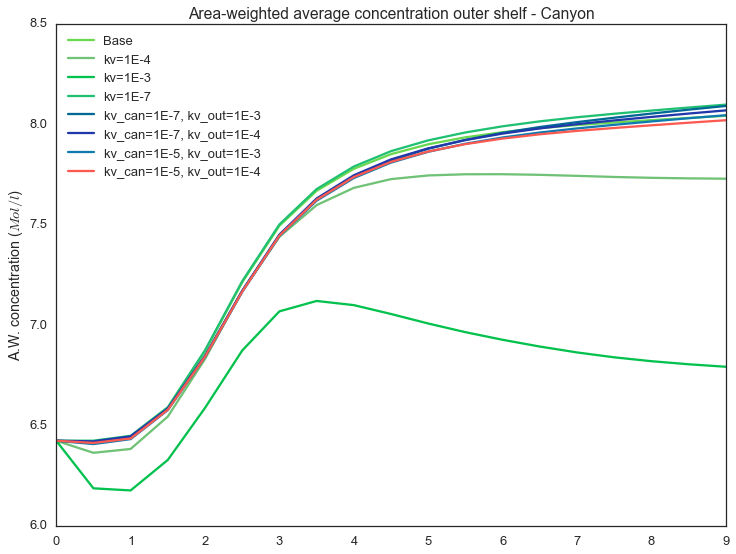

In [36]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyonOut[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration outer shelf - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


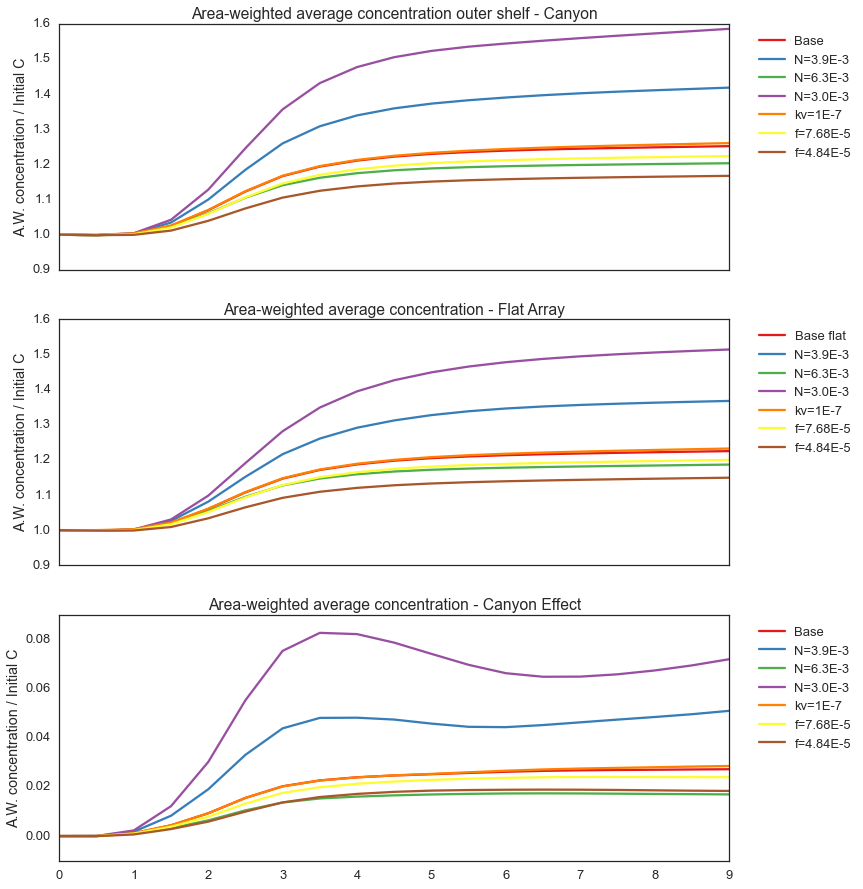

In [37]:
sns.set_palette('Set1',7)

sns.set_context('talk', font_scale=1.0)

diffList = [1,5,6,7,8,9,10]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyonOut[:,ii]/bottomConcCanyonOut[0,ii],label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration outer shelf - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,flatArrayOut[:,ii]/flatArrayOut[0,ii],label=labelsListFlatArray[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,(bottomConcCanyonOut[:,ii]/bottomConcCanyonOut[0,ii])
             -(flatArrayOut[:,ii]/flatArrayOut[0,ii]),
             label=labelsListCanyon[ii],
            )
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


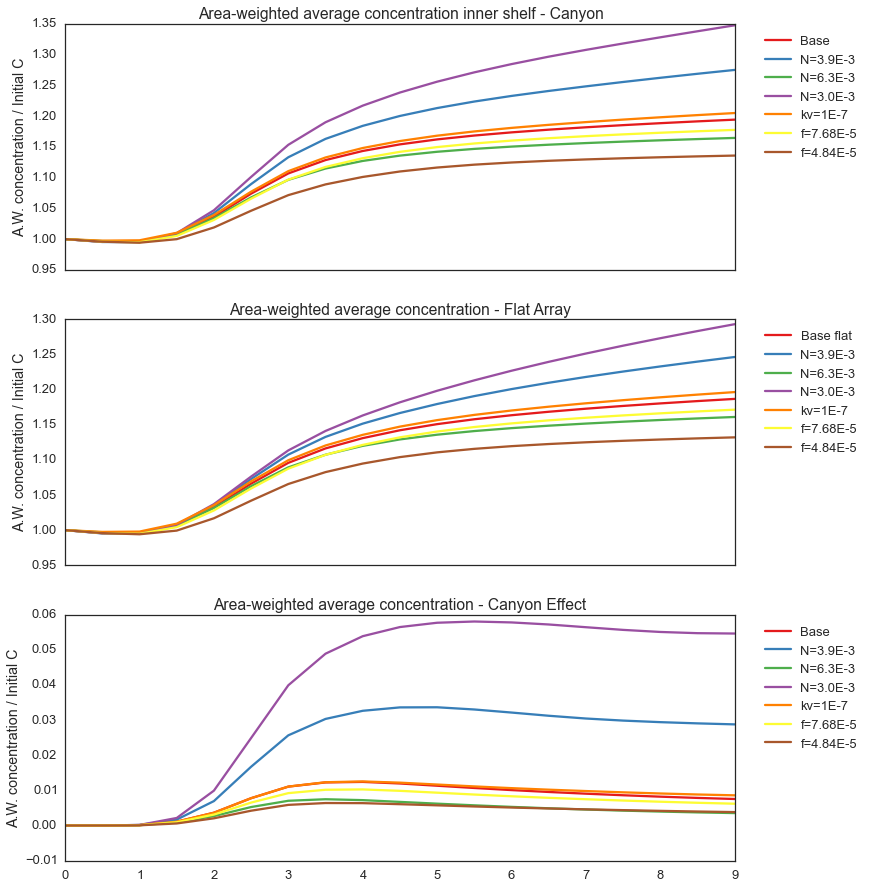

In [38]:
sns.set_palette('Set1',7)

sns.set_context('talk', font_scale=1.0)

diffList = [1,5,6,7,8,9,10]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyonIn[:,ii]/bottomConcCanyonIn[0,ii],label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration inner shelf - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,flatArrayIn[:,ii]/flatArrayIn[0,ii],label=labelsListFlatArray[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,(bottomConcCanyonIn[:,ii]/bottomConcCanyonIn[0,ii])
             -(flatArrayIn[:,ii]/flatArrayIn[0,ii]),
             label=labelsListCanyon[ii],
            )
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


## BARKLEY experiments

In [45]:
fileCanyonBarkley = 'results/metricsDataFrames/bottomConcentrationAreaFiltCanyonRunsBarkleyCoastalInt.csv'


labelsListCanyonBar = ['Linear',
                    'Salt',
                    'Oxygen',
                    'Nitrate',
                    'Silicate',
                    'Phosphate',
                    'Nitrous_Acid',
                    'Methane',
]

labelsListFlatBar = ['Linear',
                    'Salt',
                    'Oxygen',
                    'Nitrate',
                    'Silicate',
                    'Phosphate',
                    'Nitrous_Acid',
                    'Methane',
]

dfBar = pd.read_csv(fileCanyonBarkley)
columns = dfBar.columns.values.tolist()
bottomConcCanyonBarOut = np.empty((len(time),len(columns[2:10])))
bottomConcCanyonBarIn = np.empty((len(time),len(columns[10:])))

ii = 0
for col in columns[2:10]:
    
    bottomConcCanyonBarOut[:,ii] = dfBar[col] 
    ii = ii + 1

ii = 0
for col in columns[10:]:
    
    bottomConcCanyonBarIn[:,ii] = dfBar[col] 
    ii = ii + 1


In [46]:
fileFlatBarkley = 'results/metricsDataFrames/bottomConcentrationAreaFiltFlatRunsBarkleyCoastalInt.csv'

dfBarNoC = pd.read_csv(fileFlatBarkley)
columns = dfBarNoC.columns.values.tolist()

#time = dfBarNoC['time']

bottomConcFlatBarOut = np.empty((len(time),len(columns[2:10])))
bottomConcFlatBarIn = np.empty((len(time),len(columns[10:])))

ii = 0
for col in columns[2:10]:
    
    bottomConcFlatBarOut[:,ii] = dfBarNoC[col] 
    ii = ii + 1

ii = 0
for col in columns[10:]:
    
    bottomConcFlatBarIn[:,ii] = dfBarNoC[col] 
    ii = ii + 1
  

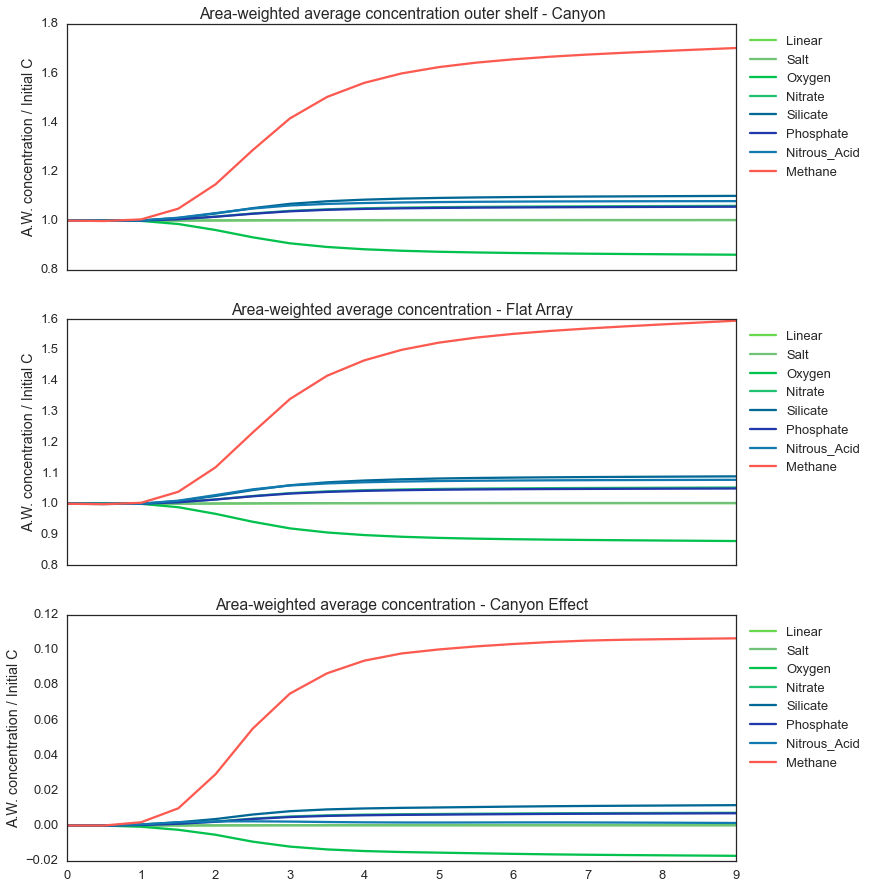

In [47]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in range(8):
    ax1.plot(times,bottomConcCanyonBarOut[:,ii]/bottomConcCanyonBarOut[0,ii],label=labelsListCanyonBar[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration outer shelf - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,bottomConcFlatBarOut[:,ii]/bottomConcFlatBarOut[0,ii],label=labelsListFlatBar[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,
             (bottomConcCanyonBarOut[:,ii]/bottomConcCanyonBarOut[0,ii])
             -(bottomConcFlatBarOut[:,ii]/bottomConcFlatBarOut[0,ii]),
             label=labelsListCanyonBar[ii]
            )
    
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


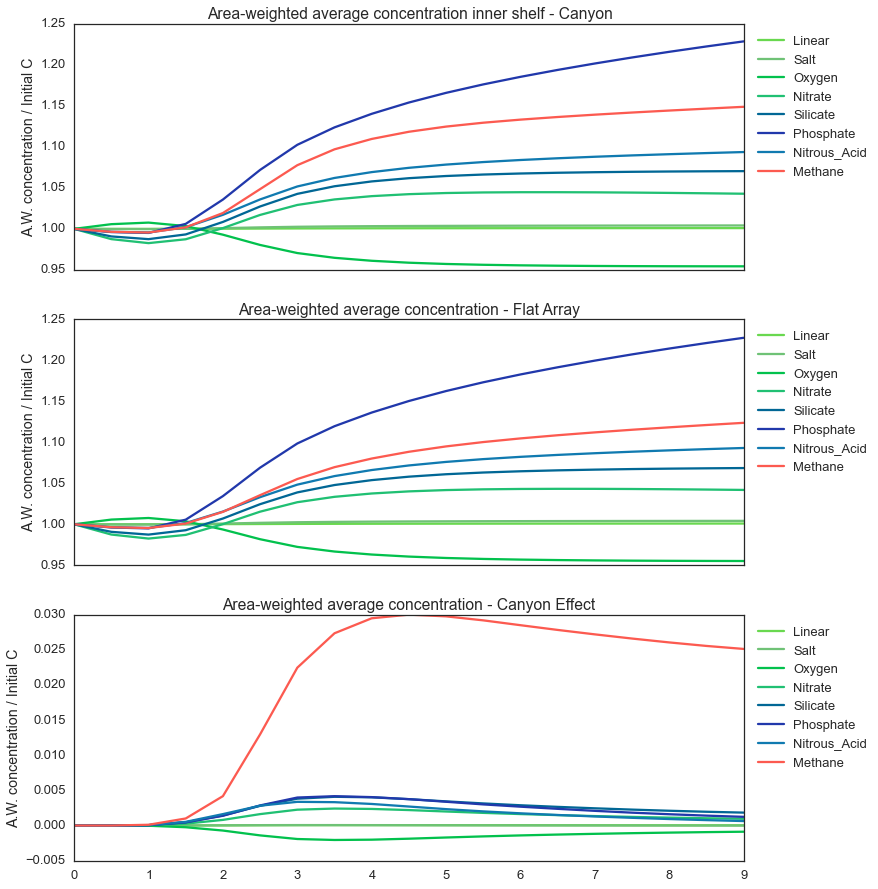

In [48]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in range(8):
    ax1.plot(times,bottomConcCanyonBarIn[:,ii]/bottomConcCanyonBarIn[0,ii],label=labelsListCanyonBar[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration inner shelf - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,bottomConcFlatBarIn[:,ii]/bottomConcFlatBarIn[0,ii],label=labelsListFlatBar[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,
             (bottomConcCanyonBarIn[:,ii]/bottomConcCanyonBarIn[0,ii])
             -(bottomConcFlatBarIn[:,ii]/bottomConcFlatBarIn[0,ii]),
             label=labelsListCanyonBar[ii]
            )
    
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


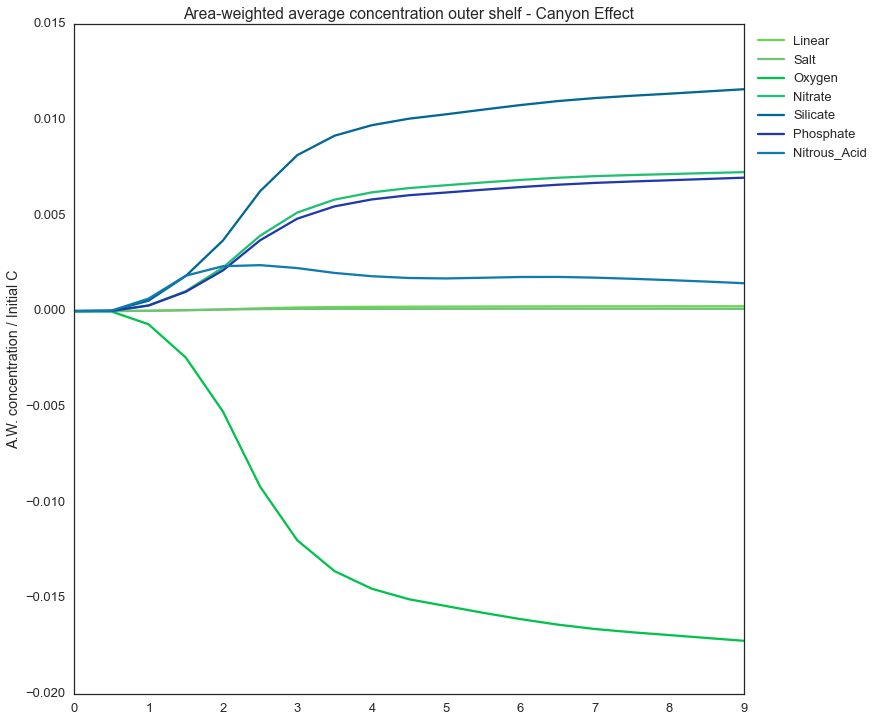

In [51]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)


times = np.arange(19)/2.0

fig,((ax3)) = plt.subplots(1, 1, figsize=(12, 12), sharex=True)

for ii in [0,1,2,3,4,5,6]:
    
    ax3.plot(times,
             (bottomConcCanyonBarOut[:,ii]/bottomConcCanyonBarOut[0,ii])
             -(bottomConcFlatBarOut[:,ii]/bottomConcFlatBarOut[0,ii]),
             label=labelsListCanyonBar[ii]
            )
    
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration outer shelf - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')
    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


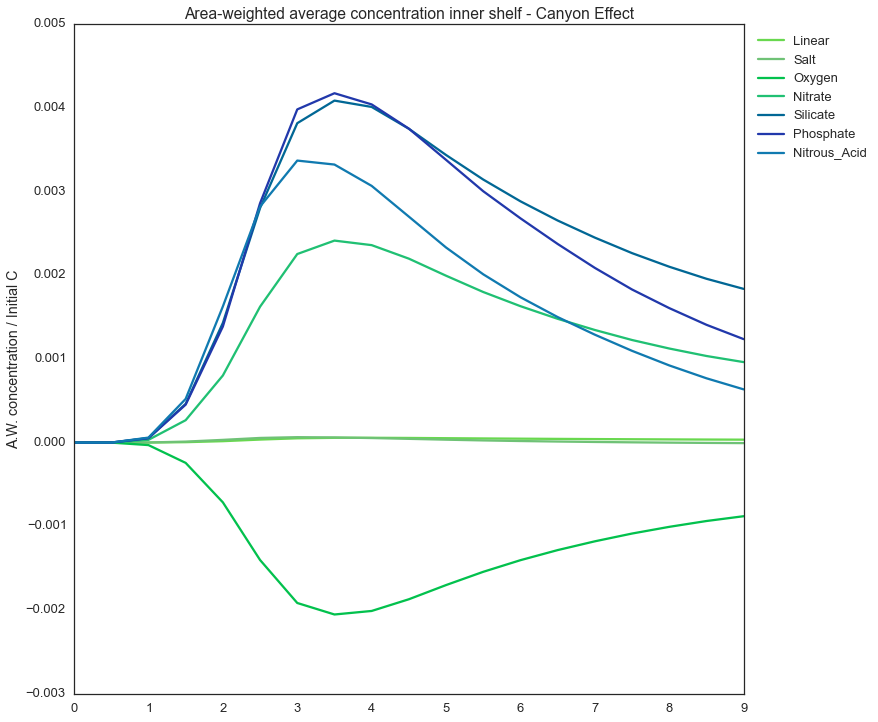

In [52]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)


times = np.arange(19)/2.0

fig,((ax3)) = plt.subplots(1, 1, figsize=(12, 12), sharex=True)

for ii in [0,1,2,3,4,5,6]:
    
    ax3.plot(times,
             (bottomConcCanyonBarIn[:,ii]/bottomConcCanyonBarIn[0,ii])
             -(bottomConcFlatBarIn[:,ii]/bottomConcFlatBarIn[0,ii]),
             label=labelsListCanyonBar[ii]
            )
    
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration inner shelf - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')
    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')
